# KNN (K Nearest Neighbours)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from scipy import stats
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split

C:\Users\Vishvam Sundararajan\AppData\Local\Temp\ipykernel_1316\2096291328.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [5]:
def EuclideanDistance(x1, x2):
    return np.sum((x1 - x2) ** 2, axis=1)

def ManhattanDistance(x1, x2):
    return np.sum(abs(x1 - x2), axis=1)

In [6]:
class KNN:
    def __init__(self, k, distance_metric=EuclideanDistance, task_type='Classification'):
        self._k = k
        self._distance_metric = distance_metric
        self._task_type = task_type
    def fit(self, X, y):
        self._X = X
        self._y = y
    def predict(self, newExample):
        distance_vector = self._distance_metric(self._X, newExample)
        k_nearest_neighbors_indices = np.argpartition(distance_vector, self._k)[:self._k]
        k_nearest_neighbors = self._y[k_nearest_neighbors_indices]
        if self._task_type == 'Classification':
            label = stats.mode(k_nearest_neighbors)[0]
        else:
            label = k_nearest_neighbors.mean()
        return label, k_nearest_neighbors_indices
    def eval(self, X_test, y_test):
        y_pred = np.zeros(y_test.shape)
        for i in range(y_test.shape[0]):
            y_predicted[i], _ = self.predict(X_test[i,:])
        if self._task_type == 'Classification': # for all examples
            error = np.mean(y_test == y_pred, axis=0)
        else:
            error_vector = y_predicted - y_test
            error = np.sqrt((error_vector.T @ error_vector) / error_vector.ravel().shape[0])
        return error

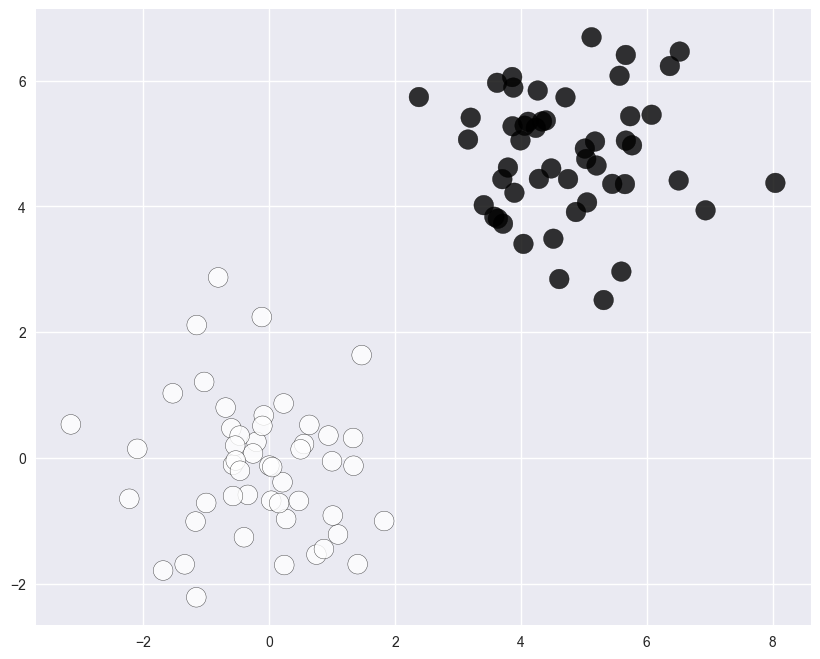

In [7]:
X, y = make_blobs(n_samples=100, n_features=2, centers=[[0,0],[5,5]], cluster_std=1, random_state=12)

plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=200, edgecolor='k',alpha=0.8)
plt.show()